In [174]:
#Assignmnet 20
"""
Question:
Build the linear regression model using scikit learn in boston data to predict 'Price'
based on other dependent variable.
"""
import numpy as np #importing numpy library
import pandas as pd #importing pandas library
import scipy.stats as stats #import scipy.stats
import matplotlib.pyplot as plt #importing matplotlib.pyplot
import sklearn #import sklearn 
from sklearn.datasets import load_boston #importing the dataset

boston = load_boston() #loading the dataset into boston 
bos_df = pd.DataFrame(boston.data,columns=boston.feature_names) #loading the data into bos_df

bos_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [175]:
bos_df['price']=boston.target # adding the price column to the bos_df
bos_df.head() #printing the top 5 rows

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
"""
Attribute Information (in order):
- CRIM     per capita crime rate by town
- ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS    proportion of non-retail business acres per town
- CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX      nitric oxides concentration (parts per 10 million)
- RM       average number of rooms per dwelling
- AGE      proportion of owner-occupied units built prior to 1940
- DIS      weighted distances to five Boston employment centres
- RAD      index of accessibility to radial highways
- TAX      full-value property-tax rate per $10,000
- PTRATIO  pupil-teacher ratio by town
- B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT    % lower status of the population
- price     Median value of owner-occupied homes in $1000's
"""

In [176]:
print(bos_df.dtypes) #gives columns values
bos_df.describe() #describe the data frame

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
price      float64
dtype: object


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [177]:
bos_df.isnull().sum() # count the null values in the coluns

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
price      0
dtype: int64

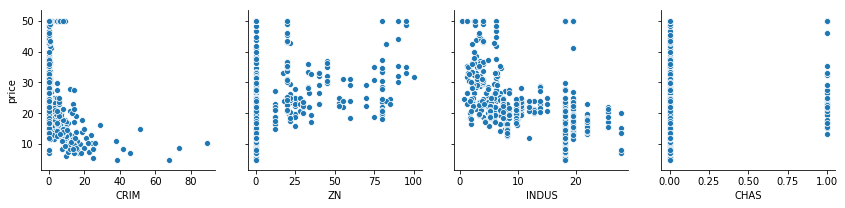

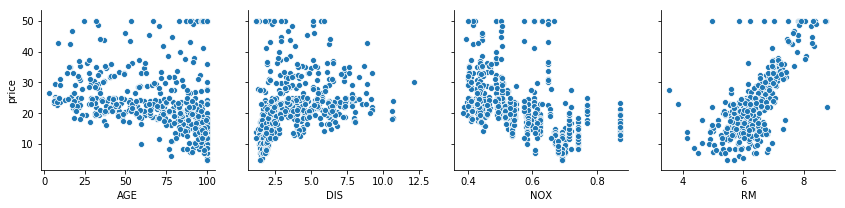

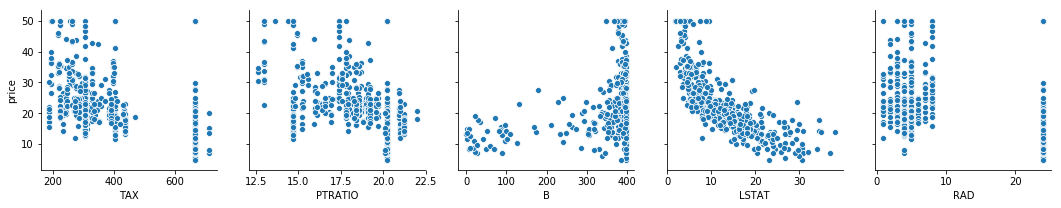

In [201]:
import seaborn as sb #importing the library
x1_vars=['CRIM','ZN','INDUS','CHAS']
x2_vars=['AGE','DIS','NOX','RM']
x3_vars=['TAX','PTRATIO','B','LSTAT','RAD']
y_vars=['price']

#drawing pair-plot to see the relationship between independent and dependent variables
sb.pairplot(bos_df, x_vars=x1_vars, y_vars=y_vars, height=3, aspect=1, kind='scatter')
sb.pairplot(bos_df, x_vars=x2_vars, y_vars=y_vars, height=3, aspect=1, kind='scatter')
sb.pairplot(bos_df, x_vars=x3_vars, y_vars=y_vars, height=3, aspect=1, kind='scatter')


In [202]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression

x1=bos_df.loc[:,['CRIM','ZN','INDUS','CHAS','AGE','DIS','NOX','RM','TAX','PTRATIO','B','LSTAT','RAD']] #slicing
y=bos_df.loc[:,['price']] #slicing

#adding q0 as features with default value 1 to reduce the bias in the model
df1 = pd.DataFrame({'q0':np.ones(len(bos_df)).astype(int)}) 
x=df1.join(x1) 

#partitioning into test and train data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)
regressor =LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

The Mean absolute error(MAE) of the model on selecting all features is 3.842810589450505
The R-squared error of the model on selecting all features is 0.5892011519186434


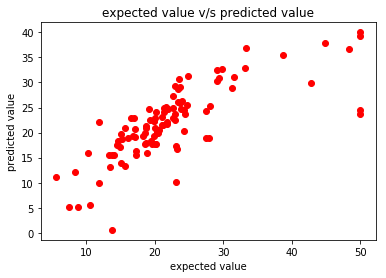

In [204]:
from sklearn import metrics # importing library
import matplotlib.pyplot as plt # importing library
y_predict=regressor.predict(x_test) #predicting the test value
print("The Mean absolute error(MAE) of the model on selecting all features is",metrics.mean_absolute_error(y_test,y_predict))
print("The R-squared error of the model on selecting all features is",regressor.score(x_test,y_test))

#plotting the expected value v/s predicted value
plt.scatter(y_test,y_predict,color='red')
plt.title('expected value v/s predicted value')
plt.xlabel('expected value')
plt.ylabel('predicted value')
plt.show()

In [192]:
"""building the optimal model using backward elimination.let us assume sig level =.05 """

# including all the features in the beginning adjusted R-squared:0.734
x_opt =x_train.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13]]
regressor_OLS =sm.OLS(endog=y_train,exog=x_opt).fit()
# print(regressor_OLS.summary())

# removing INDUS features because of large p value
x_opt =x_train.iloc[:,[0,1,2,4,5,6,7,8,9,10,11,12,13]]
regressor_OLS =sm.OLS(endog=y_train,exog=x_opt).fit()
# print(regressor_OLS.summary())

# removing INDUS and Age features because of large p value
x_opt =x_train.iloc[:,[0,1,2,4,6,7,8,9,10,11,12,13]]
regressor_OLS =sm.OLS(endog=y_train,exog=x_opt).fit()
# print(regressor_OLS.summary())

# removing INDUS, CHAS and Age features because of large p value
x_opt =x_train.iloc[:,[0,1,2,6,7,8,9,10,11,12,13]]
regressor_OLS =sm.OLS(endog=y_train,exog=x_opt).fit()
print(regressor_OLS.summary()) # Now we are getting all features with p value less than 0.5

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     130.8
Date:                Sun, 23 Sep 2018   Prob (F-statistic):          2.09e-118
Time:                        20:53:47   Log-Likelihood:                -1175.0
No. Observations:                 404   AIC:                             2372.
Df Residuals:                     393   BIC:                             2416.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
q0            38.4333      5.518      6.965      0.0

The optimized Mean absolute error(MAE) of the model  is 3.8410550494954965
The optimized R-squared error of the model  is 0.5794166448612882


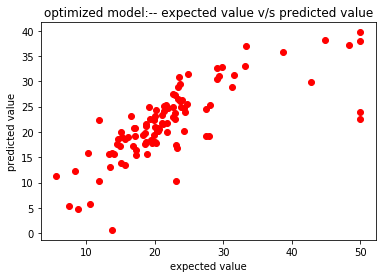

In [205]:
#Now we will create final model by removing INDUS and Age features because of large p value
regressor_opt =LinearRegression()
x_train_opt = x_train.iloc[:,[0,1,2,6,7,8,9,10,11,12,13]]
x_test_opt = x_test.iloc[:,[0,1,2,6,7,8,9,10,11,12,13]]
regressor_opt.fit(x_train_opt,y_train)
y_predict_opt=regressor_opt.predict(x_test_opt)

print("The optimized Mean absolute error(MAE) of the model  is",metrics.mean_absolute_error(y_test,y_predict_opt))
print("The optimized R-squared error of the model  is",regressor_opt.score(x_test_opt,y_test))

#plotting the expected value v/s predicted value
plt.scatter(y_test,y_predict_opt,color='red')
plt.title('optimized model:-- expected value v/s predicted value')
plt.xlabel('expected value')
plt.ylabel('predicted value')
plt.show()